In [29]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
!pip install pandas


In [5]:
# Lording the dataset
# Path to the CSV file
file_path = 'bank-full.csv'

# Data Explore

In [6]:
# Lording the dataset
# Checking if the file exists
if os.path.exists(file_path):
    print("File found. Loading data...")
    data = pd.read_csv(file_path, sep=';', quotechar='"')
    print("Data loaded successfully!")
else:
    print("File not found at the specified path.")
    print("Please make sure the file exists and the path is correct.")

# Get the count of rows in the DataFrame
num_rows = len(data)
print()
print(f"{num_rows} rows of data are available. Previewing prices of the first 50 rows:")

# Displaying the first 50 rows of the DataFrame in a tabular format
print(tabulate(data.head(50), headers='keys', tablefmt='pretty'))

File found. Loading data...
Data loaded successfully!

45211 rows of data are available. Previewing prices of the first 50 rows:
+----+-----+---------------+----------+-----------+---------+---------+---------+------+---------+-----+-------+----------+----------+-------+----------+----------+----+
|    | age |      job      | marital  | education | default | balance | housing | loan | contact | day | month | duration | campaign | pdays | previous | poutcome | y  |
+----+-----+---------------+----------+-----------+---------+---------+---------+------+---------+-----+-------+----------+----------+-------+----------+----------+----+
| 0  | 58  |  management   | married  | tertiary  |   no    |  2143   |   yes   |  no  | unknown |  5  |  may  |   261    |    1     |  -1   |    0     | unknown  | no |
| 1  | 44  |  technician   |  single  | secondary |   no    |   29    |   yes   |  no  | unknown |  5  |  may  |   151    |    1     |  -1   |    0     | unknown  | no |
| 2  | 33  | entrepre

In [7]:
# Get the shape of the dataset
data.shape

(45211, 17)

In [8]:
# Display data types of columns
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
# Descriptive statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

In [10]:
# For categorical data, use include='object'
print(data.describe(include='object'))

                job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922  


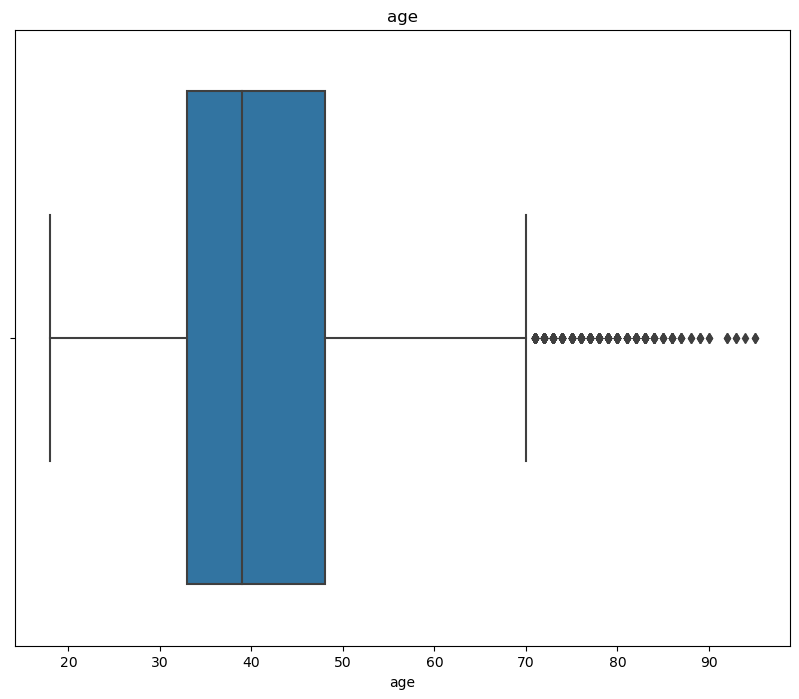

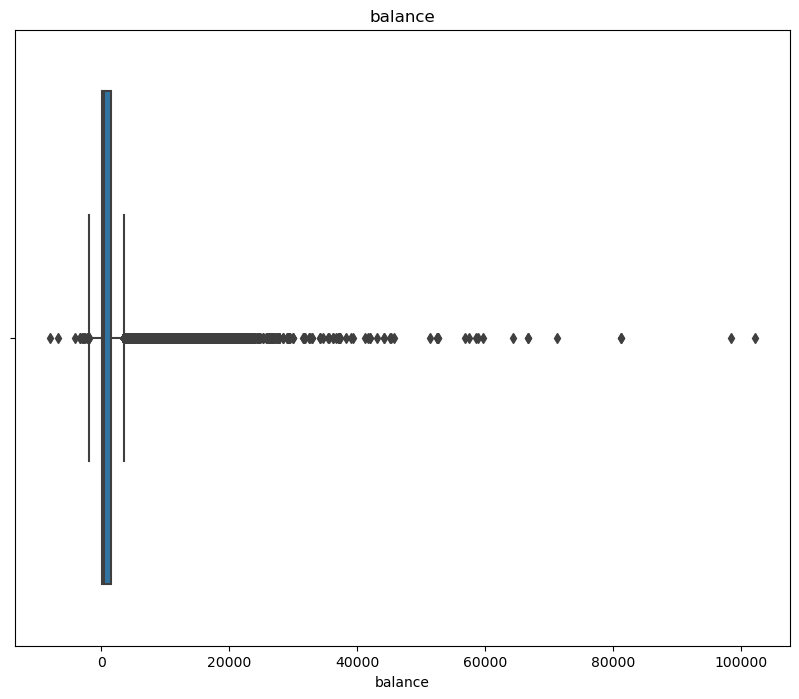

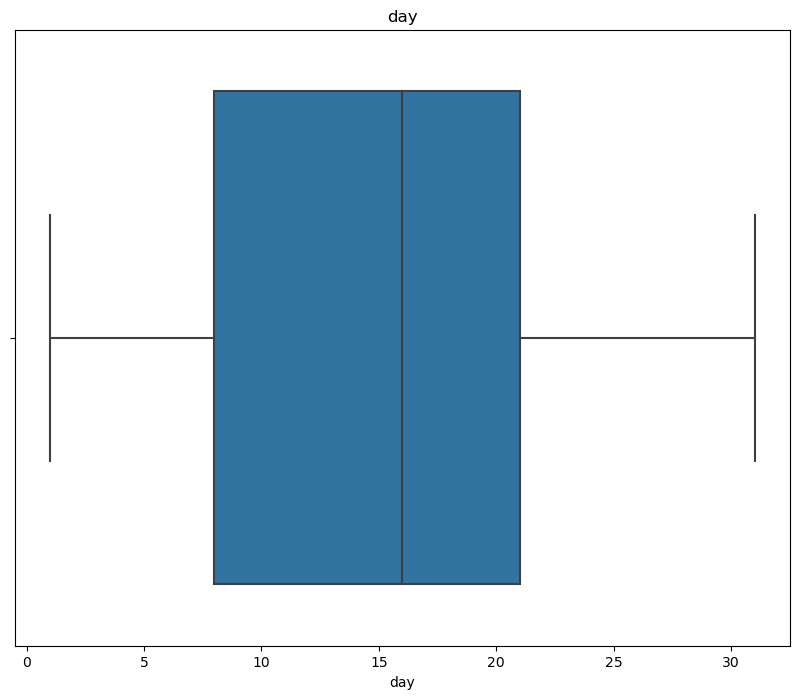

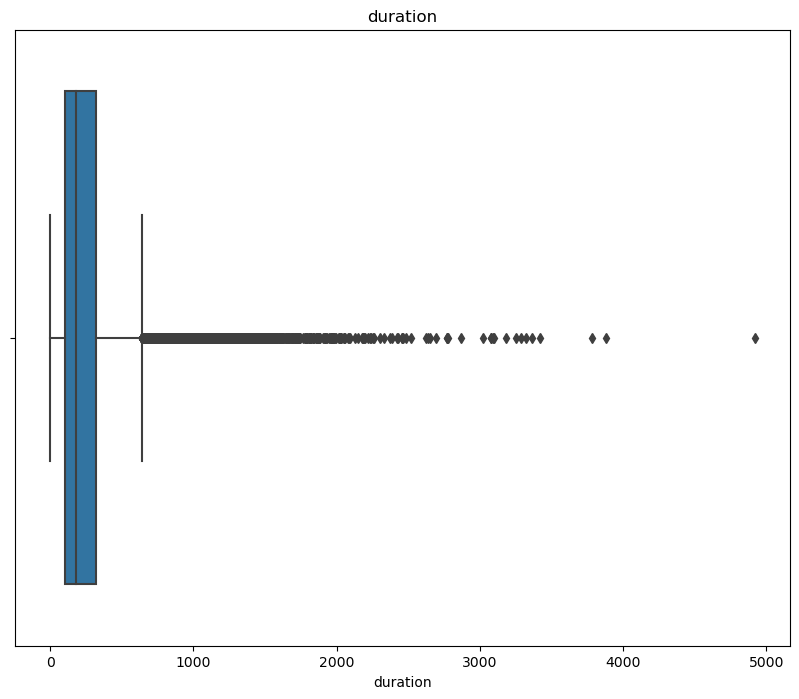

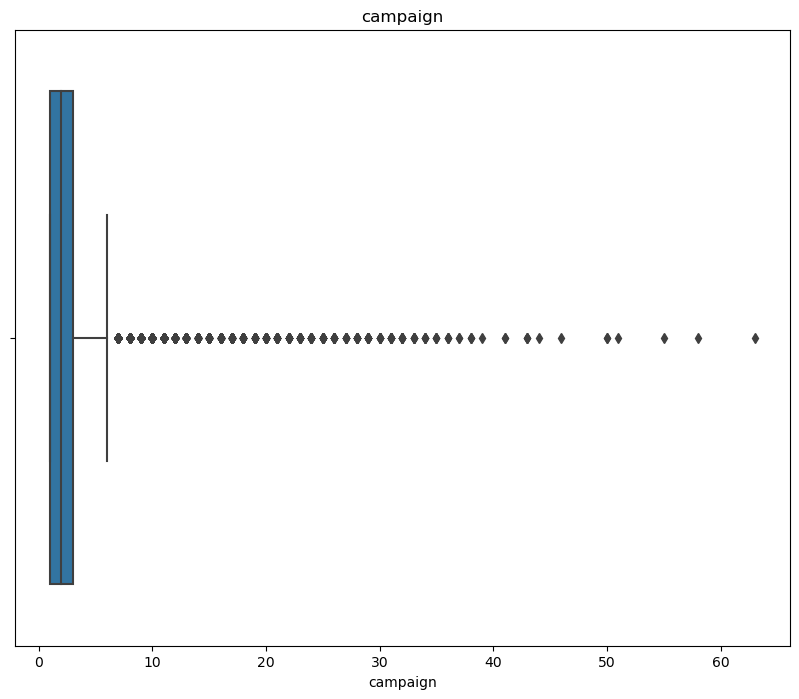

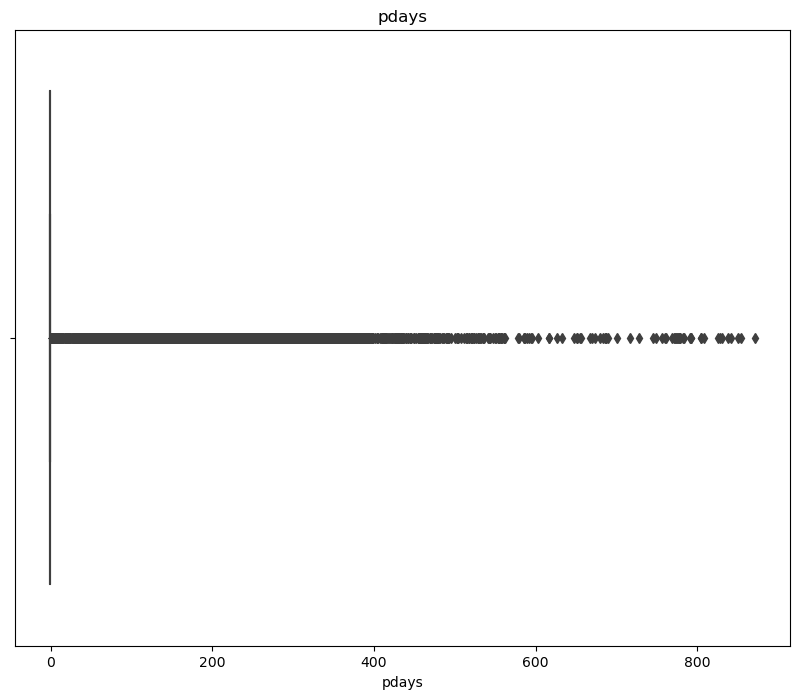

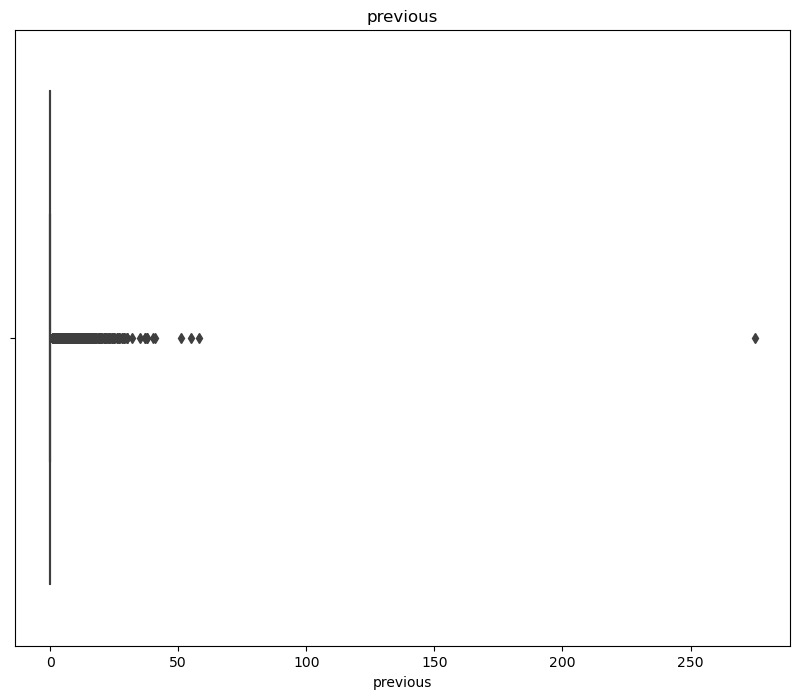

In [11]:
# Box plots for numerical features
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=data[column])
    plt.title(column)
    plt.show()

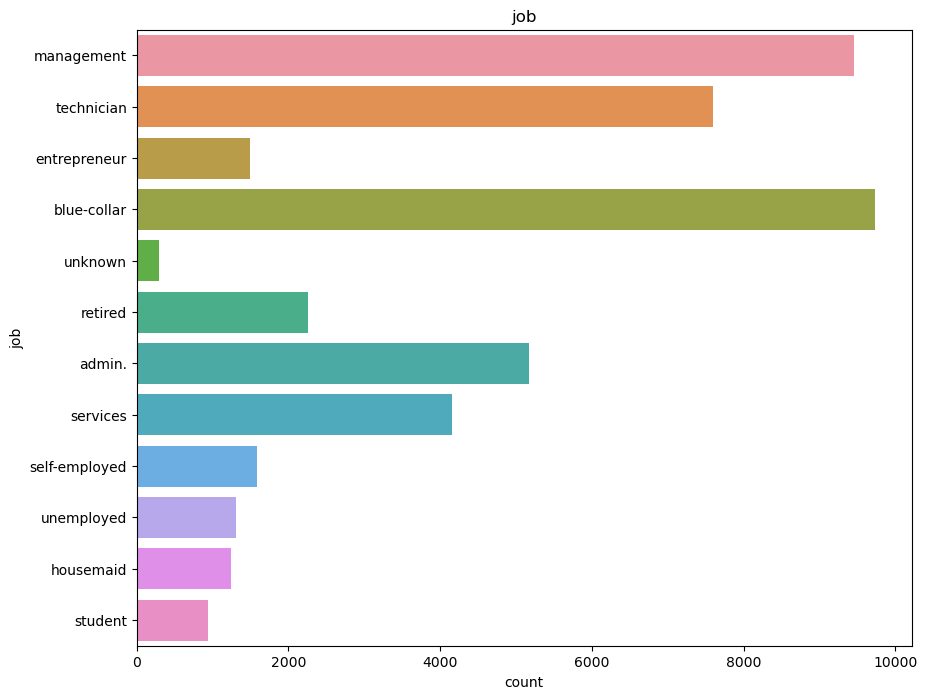

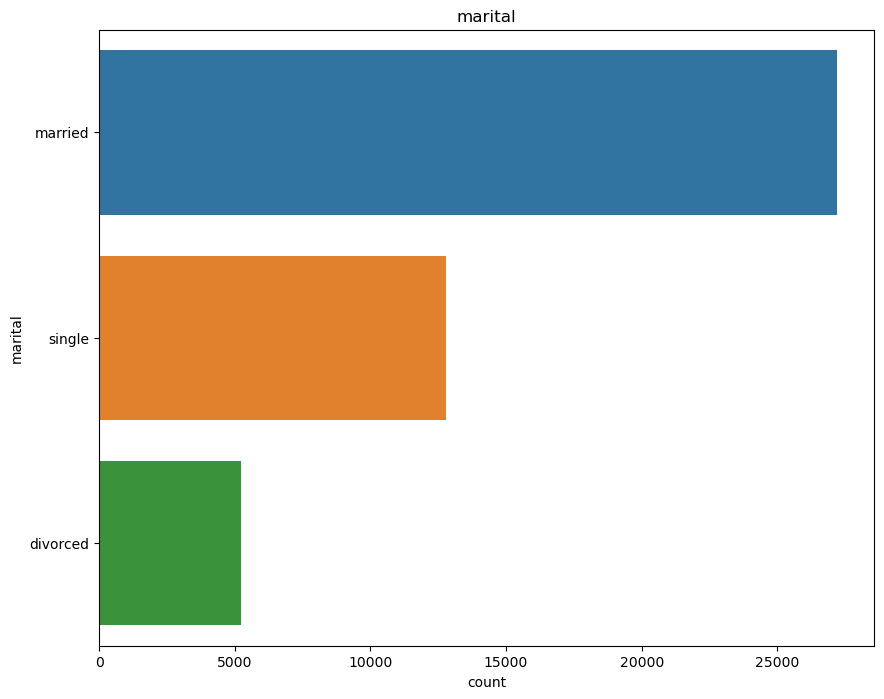

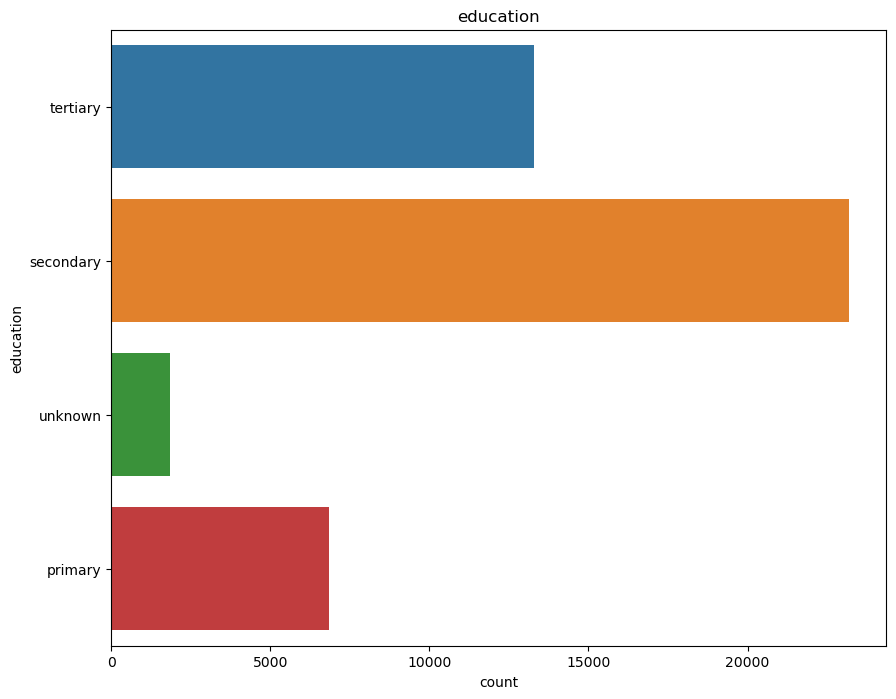

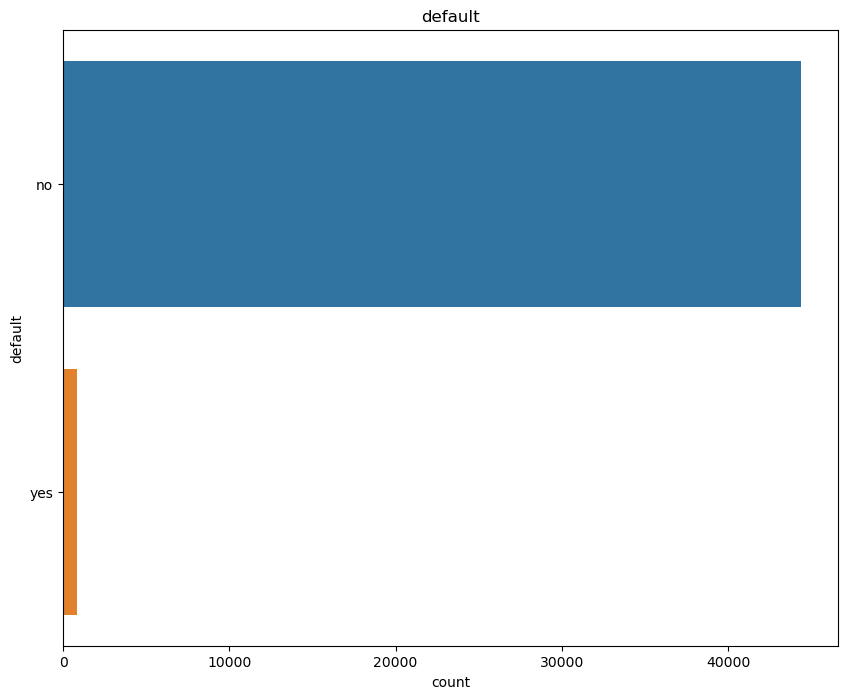

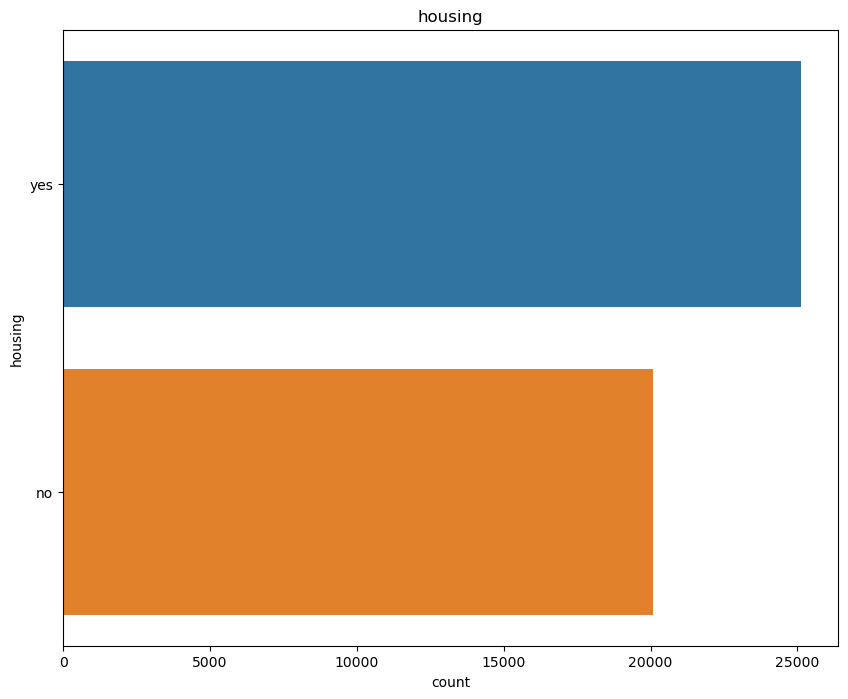

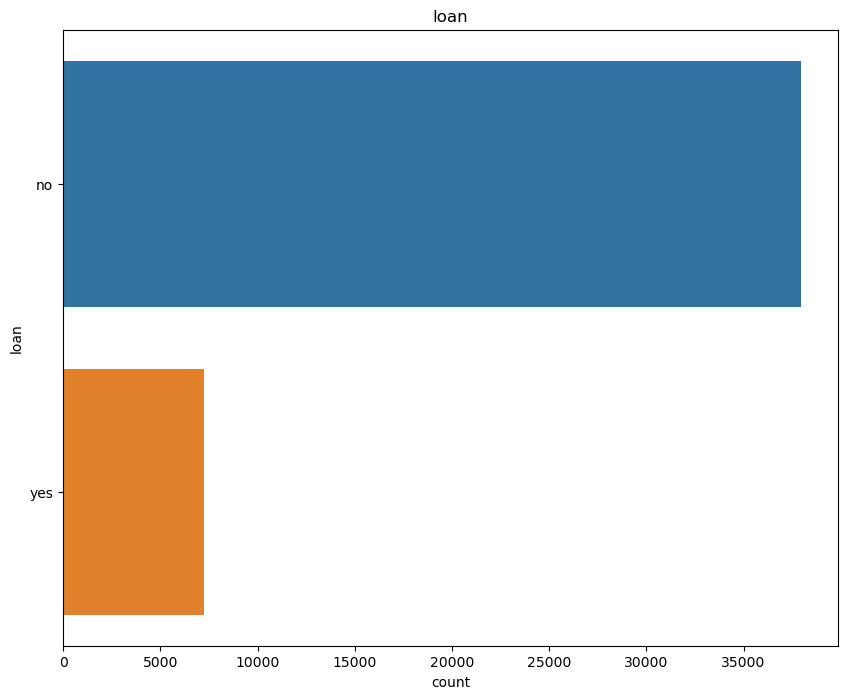

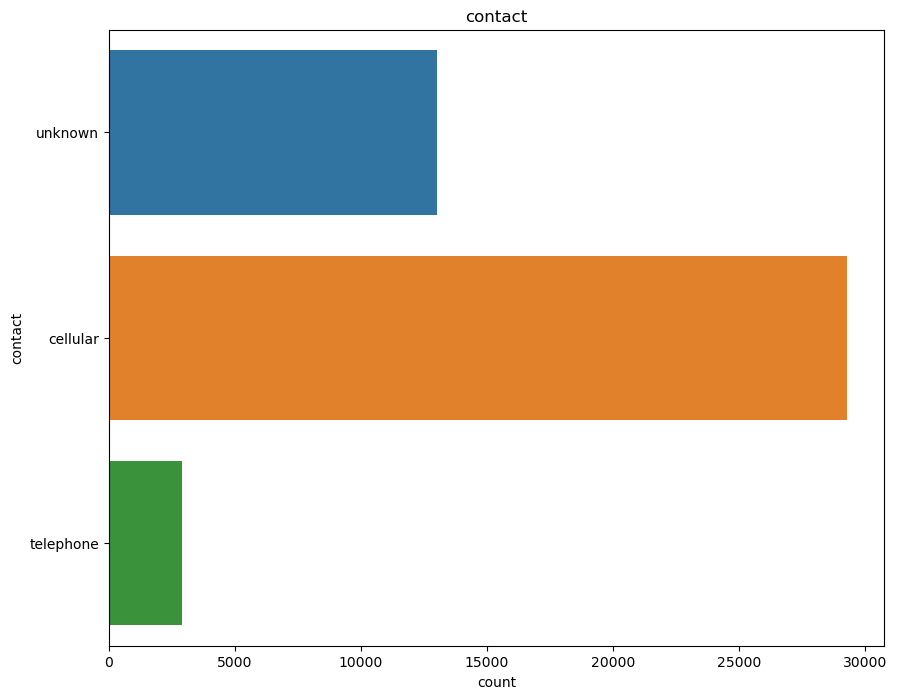

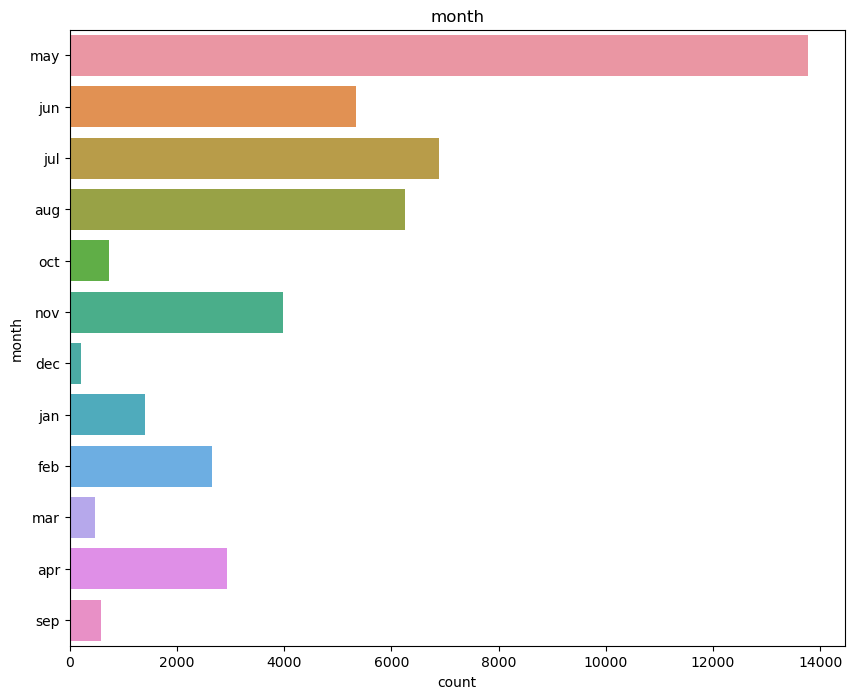

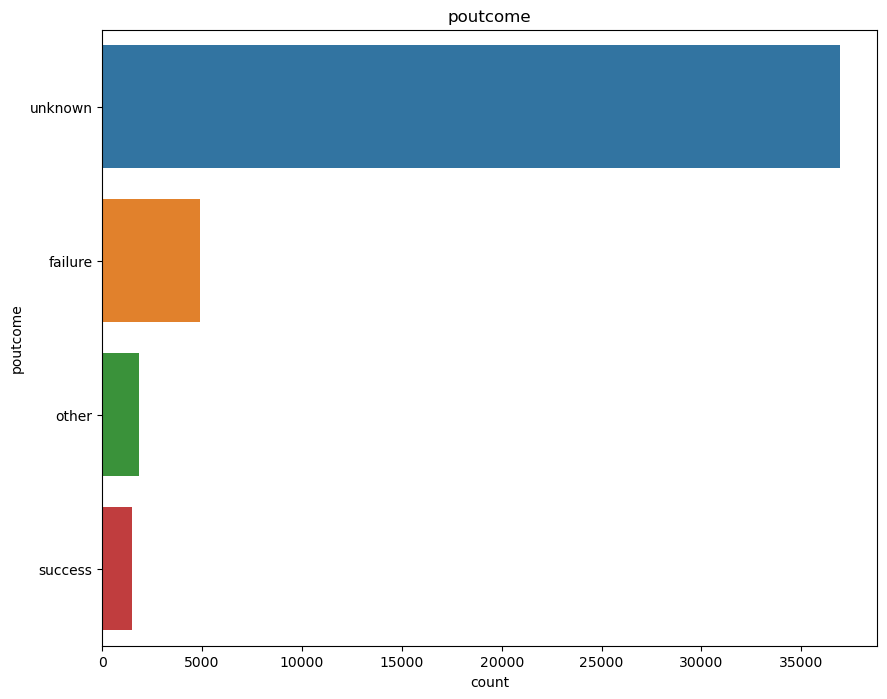

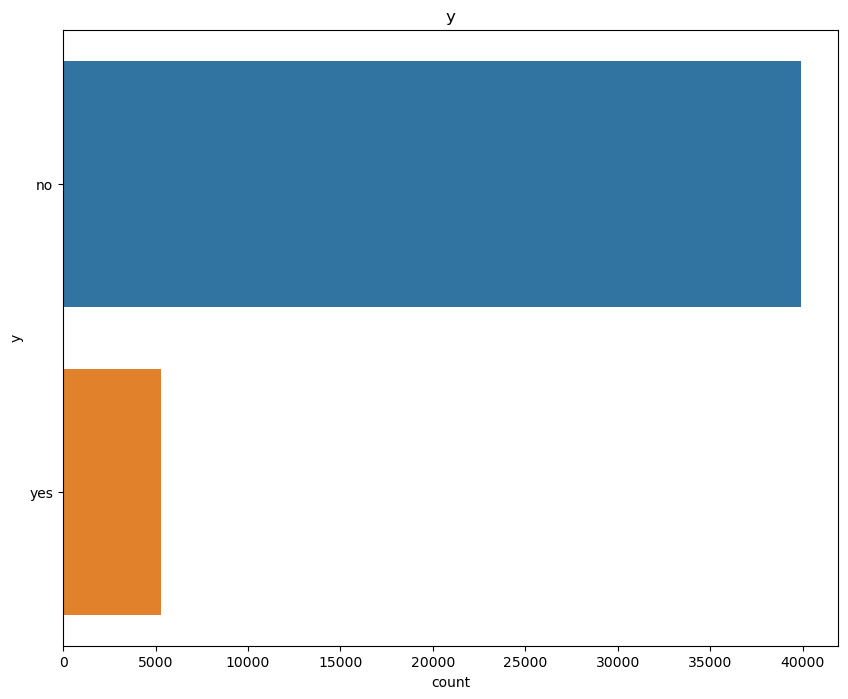

In [12]:
# Count plots for categorical data
for column in data.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 8))
    sns.countplot(y=data[column])
    plt.title(column)
    plt.show()

C:\Users\DEWMI\AppData\Local\Temp\ipykernel_8572\1545606443.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


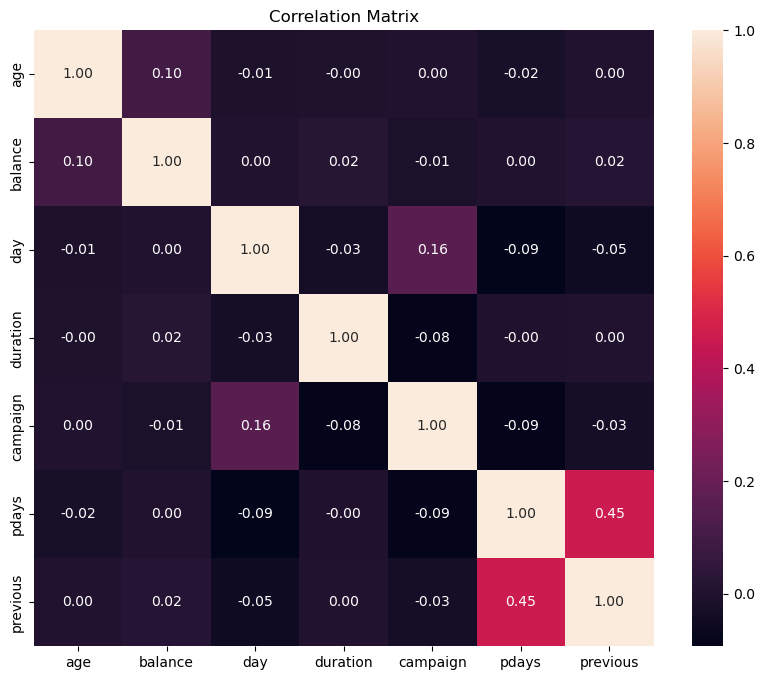

In [13]:
# Correlations Between Features
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing

In [14]:
# Identifying missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [15]:
# Check for duplicates
#Identifying duplicates
duplicates = data[data.duplicated()]

print(data.duplicated().sum())

#Print duplicates
print("Duplicate Rows:")
print(duplicates)

0
Duplicate Rows:
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [16]:
# Columns to encode
columns_to_encode = ['default', 'housing', 'loan', 'y']

# Encoding 'yes' as 1 and 'no' as 0
for column in columns_to_encode:
    data[column] = data[column].map({'yes': 1, 'no': 0})

# Display success message
print("Encoding of 'yes' and 'no' values successful!")

# Optionally, check the first few rows to verify changes
print(data.head())

Encoding of 'yes' and 'no' values successful!
   age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0  


In [17]:
# Selecting the categorical columns 
categorical_cols = ['job', 'marital', 'education',  'contact', 'month', 'poutcome']

# Applying one-hot encoding to our selected categorical columns
df_encoded = pd.get_dummies(data, columns=categorical_cols)

print(df_encoded.head(10))

   age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   
5   35        0      231        1     0    5       139         1     -1   
6   28        0      447        1     1    5       217         1     -1   
7   42        1        2        1     0    5       380         1     -1   
8   58        0      121        1     0    5        50         1     -1   
9   43        0      593        1     0    5        55         1     -1   

   previous  ...  month_jun  month_mar  month_may  month_nov  month_oct  \
0         0  ...          0          0          1          0          0   
1         0  ...        

In [18]:
#scalling
# Select columns to scale
columns_to_scale = ['age', 'balance', 'duration']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(df_encoded[columns_to_scale])

# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Combine scaled columns with the rest of the DataFrame
final_data = pd.concat([df_encoded.drop(columns=columns_to_scale), scaled_df], axis=1)

# Display the final DataFrame
print(final_data)


       default  housing  loan  day  campaign  pdays  previous  y  job_admin.  \
0            0        1     0    5         1     -1         0  0           0   
1            0        1     0    5         1     -1         0  0           0   
2            0        1     1    5         1     -1         0  0           0   
3            0        1     0    5         1     -1         0  0           0   
4            0        0     0    5         1     -1         0  0           0   
...        ...      ...   ...  ...       ...    ...       ... ..         ...   
45206        0        0     0   17         3     -1         0  1           0   
45207        0        0     0   17         2     -1         0  1           0   
45208        0        0     0   17         5    184         3  1           0   
45209        0        0     0   17         4     -1         0  0           0   
45210        0        0     0   17         2    188        11  0           0   

       job_blue-collar  ...  month_nov 

# Training Model

In [19]:
final_df = final_data

# Define features (X) and target variable (y)
X = final_df.drop(columns=['y'])  # Assuming 'y' is the target variable
y = final_df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.8907442220502045


# Evaluate

In [20]:
# Generate and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.67      0.19      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming svm_classifier is  trained model and X_train, y_train are your training data
y_train_pred = svm_classifier.predict(X_train)

# Calculate accuracy on the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on training data:", accuracy_train)

# For a more detailed report
report = classification_report(y_train, y_train_pred)
print("Classification report on training data:\n", report)


Accuracy on training data: 0.8941038224925693
Classification report on training data:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     25588
           1       0.65      0.19      0.29      3346

    accuracy                           0.89     28934
   macro avg       0.77      0.59      0.62     28934
weighted avg       0.87      0.89      0.87     28934



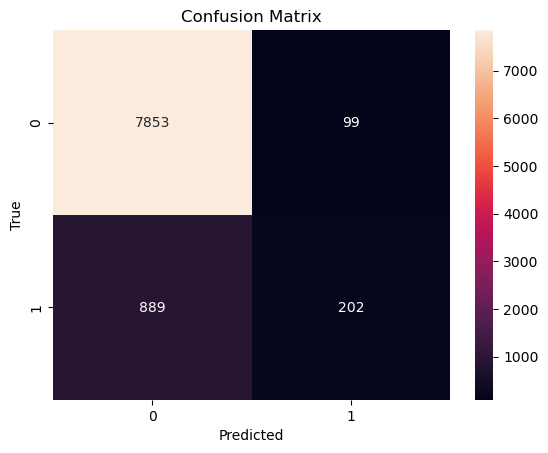

In [30]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

# Hyperparameter tuning

In [23]:
# Parameter grid for GridSearch
param_grid = {
    'C': [1, 10],  # Regularization parameter # Reduced number of options
    'gamma': [0.01, 0.1, 'scale'],  # Kernel coefficient # Reduced the options
    'kernel': ['rbf', 'linear']  # Type of SVM kernel # Focus on most promising kernels
}


In [28]:
# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

# View the best parameters from the GridSearch
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the best model found by GridSearch
accuracy = accuracy_score(y_test, y_pred)
print("Enhanced accuracy on test set:", accuracy)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  14.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  13.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  13.3s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  16.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  15.1s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time= 7.7min
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time= 7.2min
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=20.5min
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time= 8.7min
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=13.6min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time= 1.8min
[CV] END .........................C=1, gamma=0.1

##